In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats #for qq plot

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day30-function-transformer/train.csv")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S


In [18]:
df = df[['Age','Fare','Survived']]
df.sample(5)

,Age,Fare,Survived
208,16.0,7.7500,1
525,40.5,7.7500,0
552,NaN,7.8292,0
275,63.0,77.9583,1
486,35.0,90.0000,1


In [19]:
df.isnull().sum()

Age         177
Fare          0
Survived      0
dtype: int64

In [20]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [21]:
df.isnull().sum()

Age         0
Fare        0
Survived    0
dtype: int64

In [22]:
df.sample(5)

,Age,Fare,Survived
208,16.000000,7.7500,1
855,18.000000,9.3500,1
16,2.000000,29.1250,0
674,29.699118,0.0000,0
22,15.000000,8.0292,1


In [23]:
x = df.iloc[:,0:2]
y = df.iloc[:,2]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

To check whether our feature columns are normally distributed or not using qq plot

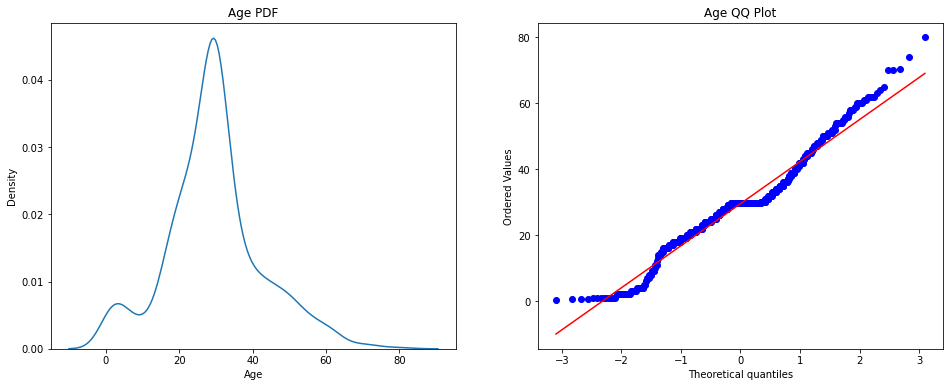

In [46]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.kdeplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(1,2,2)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

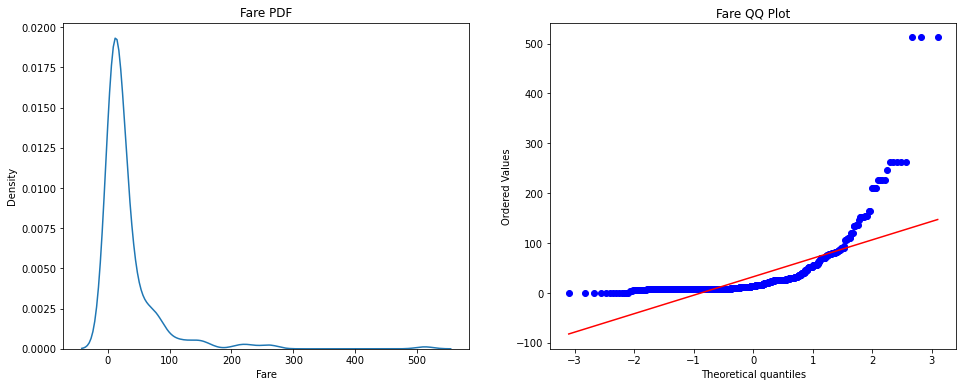

In [47]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.kdeplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [57]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [58]:
#LR
clf1.fit(x_train,y_train)
y_pred1 = clf1.predict(x_test)
accuracy_score(y_test,y_pred1)

0.6480446927374302

In [59]:
#DT
clf2.fit(x_train,y_train)
y_pred2 = clf2.predict(x_test)
accuracy_score(y_test,y_pred2)

0.6815642458100558

In [60]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [62]:
trf = FunctionTransformer(func=np.log1p)

In [64]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [65]:
#LR after applying log transformer
clf1.fit(x_train_transformed,y_train)
y_pred1 = clf1.predict(x_test_transformed)
accuracy_score(y_test,y_pred1)

0.6815642458100558

In [66]:
#DT after applying log transformer
clf2.fit(x_train_transformed,y_train)
y_pred2 = clf2.predict(x_test_transformed)
accuracy_score(y_test,y_pred2)

0.6703910614525139

In [67]:
# NO IMPACT ON DT MODEL
# IMPACT ON LOGISTIC REGRESSION MODEL

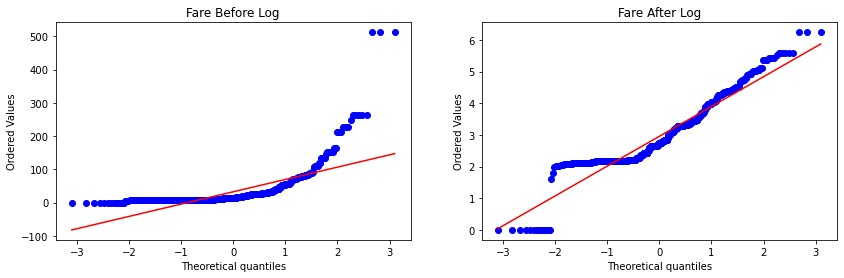

In [69]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

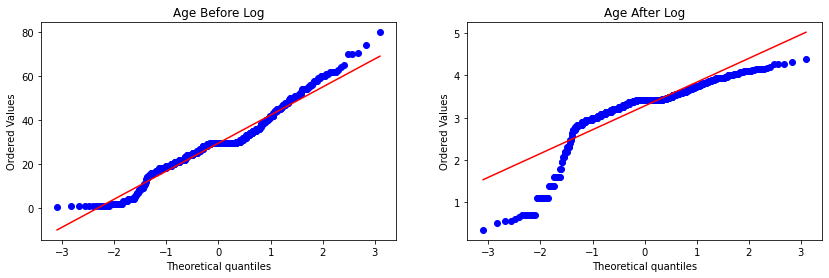

In [70]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()